### Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable with an arbitrary value. The arbitrary value should be different from the mean or median and not within the normal values of the variable.
### We can use arbitrary values such as 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv', usecols=["Age","Fare","Survived"])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
def impute_nan(df,variable):             # Arbitrary Value Imputation function
 df[variable+'_zero']=df[variable].fillna(0)
 df[variable+'_ninetynine']=df[variable].fillna(99)

In [4]:
impute_nan(df,'Age')

In [5]:
df

,Survived,Age,Fare,Age_zero,Age_ninetynine
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,0.0,99.0
889,1,26.0,30.0000,26.0,26.0


Text(0.5, 1.0, 'Age vs Age_zero')

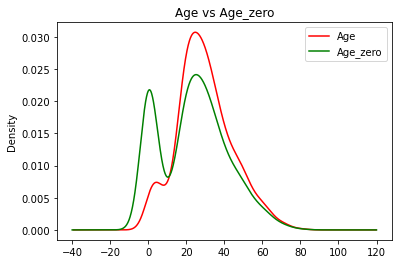

In [6]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='red')
df.Age_zero.plot(kind='kde',ax=ax,color='green')
ax.legend(loc='best')
plt.title('Age vs Age_zero')

Text(0.5, 1.0, 'Age vs Age_ninetynine')

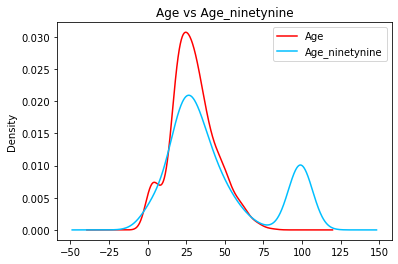

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='red')
df.Age_ninetynine.plot(kind='kde',ax=ax,color='deepskyblue')
ax.legend(loc='best')
plt.title('Age vs Age_ninetynine')

Text(0.5, 1.0, 'Age vs Age_zero  vs Age_ninetynine')

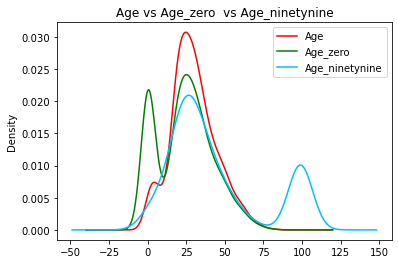

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='red')
df.Age_zero.plot(kind='kde',ax=ax,color='green')
df.Age_ninetynine.plot(kind='kde',ax=ax,color='deepskyblue')
ax.legend(loc='best')
plt.title('Age vs Age_zero  vs Age_ninetynine')

## Advantages
1. Easy to implement  <br>
2. Captures the importance of missing values if there is one

## Disadvantages
1. Distortion of the original variable distribution and variance. <br>
2. Distortion of the covariance with the remaining dataset variables. <br>
3. If the arbitrary value is at the end of the distribution, it may mask or create outliers. <br>
4. We need to be careful not to choose an arbitrary value too similar to the mean or median (or any other typical value of the variable distribution). <br>
5. The higher the percentage of NA, the higher the distortions. <br>